In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import load_digits

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
df = load_digits()

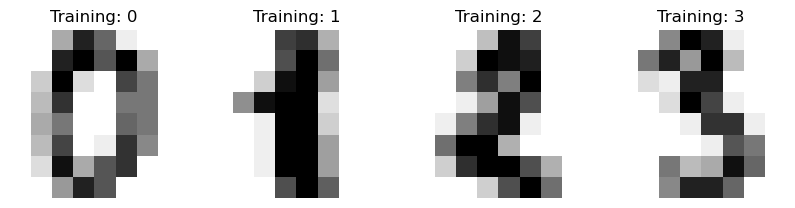

In [7]:
_, axes = plt.subplots(nrows=1 ,ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [8]:
df.images.shape

(1797, 8, 8)

In [9]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [10]:
df.images[0].shape

(8, 8)

In [11]:
len(df.images)

1797

In [12]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [13]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [14]:
data[0].shape

(64,)

In [15]:
data.shape

(1797, 64)

In [16]:
data.min()

0.0

In [17]:
data.max()

16.0

In [18]:
data = data/16

In [19]:
data.min()

0.0

In [20]:
data.max()

1.0

In [21]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf = RandomForestClassifier()

In [27]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
y_pred = rf.predict(X_test)

In [29]:
y_pred

array([3, 9, 4, 4, 1, 1, 6, 8, 3, 9, 8, 5, 1, 2, 5, 0, 3, 3, 9, 6, 7, 5,
       7, 2, 3, 6, 9, 7, 9, 4, 6, 0, 0, 2, 4, 2, 5, 5, 0, 9, 5, 3, 7, 9,
       5, 6, 7, 5, 8, 0, 7, 5, 8, 0, 2, 3, 0, 0, 1, 7, 9, 5, 9, 4, 5, 5,
       0, 2, 0, 0, 3, 1, 5, 0, 4, 5, 4, 9, 8, 4, 2, 5, 7, 9, 9, 3, 5, 7,
       1, 6, 2, 6, 0, 6, 2, 5, 6, 7, 2, 6, 5, 1, 7, 3, 6, 4, 5, 6, 7, 9,
       1, 3, 1, 9, 1, 8, 3, 2, 2, 5, 7, 4, 2, 3, 0, 4, 8, 4, 4, 3, 2, 9,
       8, 3, 8, 4, 2, 3, 2, 7, 4, 1, 4, 5, 6, 9, 1, 2, 1, 7, 3, 0, 0, 0,
       0, 6, 5, 7, 4, 0, 7, 5, 7, 2, 8, 2, 7, 5, 5, 3, 6, 4, 0, 1, 0, 3,
       6, 0, 9, 1, 9, 2, 7, 8, 2, 7, 1, 1, 4, 5, 2, 3, 6, 2, 8, 0, 3, 2,
       4, 8, 2, 0, 1, 2, 6, 1, 7, 4, 4, 5, 8, 5, 0, 2, 5, 2, 6, 3, 0, 7,
       1, 6, 5, 0, 6, 1, 0, 2, 9, 1, 0, 0, 5, 8, 7, 3, 7, 0, 6, 0, 5, 7,
       2, 0, 6, 2, 9, 9, 9, 6, 6, 8, 8, 5, 4, 1, 7, 1, 2, 0, 8, 1, 2, 1,
       5, 8, 7, 4, 1, 6, 1, 0, 9, 3, 7, 0, 4, 4, 5, 6, 6, 1, 7, 8, 1, 5,
       5, 7, 0, 6, 2, 0, 1, 8, 7, 1, 4, 4, 8, 0, 4,

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
confusion_matrix(y_test, y_pred)

array([[54,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 54,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 50,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 55,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 56,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 52,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 57,  0,  1],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 46,  0],
       [ 0,  1,  0,  1,  0,  2,  0,  0,  1, 47]])

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.95      1.00      0.97        54
           2       0.98      1.00      0.99        54
           3       0.98      0.98      0.98        51
           4       0.95      1.00      0.97        55
           5       0.95      0.97      0.96        58
           6       1.00      0.98      0.99        53
           7       1.00      0.98      0.99        58
           8       0.96      0.94      0.95        49
           9       0.96      0.90      0.93        52

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

